# Real Time Prediction Of Polymer Quality

In [2]:
#Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#Importing The dataSet
df = pd.read_csv(r'D:\Data_MFR_310 (1).csv')

In [4]:
df.head()

,Unnamed: 0,513FC31103.pv,513HC31114-5.mv,513PC31201.pv,513LC31202.pv,513FC31409.pv,513FC31114-5.pv,513TC31220.pv,MFR
0,04-05-2018 19:45,24856.584,0.153,30.414835,79.657906,50850.578,0.163994,80.399605,3.4
1,04-05-2018 21:45,25537.250,0.153,30.527121,78.532608,42229.813,0.129739,78.861328,3.2
2,04-05-2018 23:45,25689.266,0.153,30.356180,78.842636,45335.852,0.150003,78.818115,3.2
3,04-06-2018 01:45,25098.754,0.153,30.894308,79.173500,43077.016,0.151543,79.022720,3.1
4,04-06-2018 03:45,24853.941,0.150,30.680647,78.677299,40404.387,0.122582,79.038483,3.3


In [5]:
#Changing The Column Name For our sake of simplicity 

df.columns = ['TimeStamp','Propylene flow','Hydrogen ratio','Pressure controller','Level controller','Liquefied Recycle gas to R-310 dome top','Hydrogen Flow','Temperature controller','MFR']

In [6]:
df.head()

,TimeStamp,Propylene flow,Hydrogen ratio,Pressure controller,Level controller,Liquefied Recycle gas to R-310 dome top,Hydrogen Flow,Temperature controller,MFR
0,04-05-2018 19:45,24856.584,0.153,30.414835,79.657906,50850.578,0.163994,80.399605,3.4
1,04-05-2018 21:45,25537.250,0.153,30.527121,78.532608,42229.813,0.129739,78.861328,3.2
2,04-05-2018 23:45,25689.266,0.153,30.356180,78.842636,45335.852,0.150003,78.818115,3.2
3,04-06-2018 01:45,25098.754,0.153,30.894308,79.173500,43077.016,0.151543,79.022720,3.1
4,04-06-2018 03:45,24853.941,0.150,30.680647,78.677299,40404.387,0.122582,79.038483,3.3


In [7]:
#Dropping TimeStamp

df.drop('TimeStamp',axis=1,inplace=True)

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Propylene flow,2486.0,25306.285729,1706.481672,16106.025000,24361.632000,25365.754500,26398.452250,30083.688000
Hydrogen ratio,2560.0,0.178427,0.077473,0.000000,0.136000,0.173500,0.200000,0.980000
Pressure controller,2484.0,30.663706,0.423345,26.946344,30.446129,30.622631,30.925738,32.674332
Level controller,2484.0,77.651055,0.919600,74.575958,76.992151,77.494477,78.210867,83.841675
Liquefied Recycle gas to R-310 dome top,2484.0,42525.140000,11331.868960,9610.464800,34795.535000,41550.562500,50010.295000,106073.610000
Hydrogen Flow,2486.0,0.138530,0.041869,0.022162,0.113764,0.132986,0.156990,0.677979
Temperature controller,2484.0,80.144365,0.823554,77.760117,79.677458,80.044308,80.496296,91.566544
MFR,2564.0,8.185218,5.088696,1.500000,3.700000,4.300000,12.900000,38.000000


In [9]:
#Check the information of data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2564 entries, 0 to 2563
Data columns (total 8 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Propylene flow                           2486 non-null   float64
 1   Hydrogen ratio                           2560 non-null   float64
 2   Pressure controller                      2484 non-null   float64
 3   Level controller                         2484 non-null   float64
 4   Liquefied Recycle gas to R-310 dome top  2484 non-null   float64
 5   Hydrogen Flow                            2486 non-null   float64
 6   Temperature controller                   2484 non-null   float64
 7   MFR                                      2564 non-null   float64
dtypes: float64(8)
memory usage: 160.4 KB


In [10]:
#Checking the maximum MFR
df['MFR'].max()

38.0

In [11]:
#Checking the minimum MFR
df['MFR'].min()

1.5

In [12]:
#Checking the null values
df.isnull().sum()

Propylene flow                             78
Hydrogen ratio                              4
Pressure controller                        80
Level controller                           80
Liquefied Recycle gas to R-310 dome top    80
Hydrogen Flow                              78
Temperature controller                     80
MFR                                         0
dtype: int64

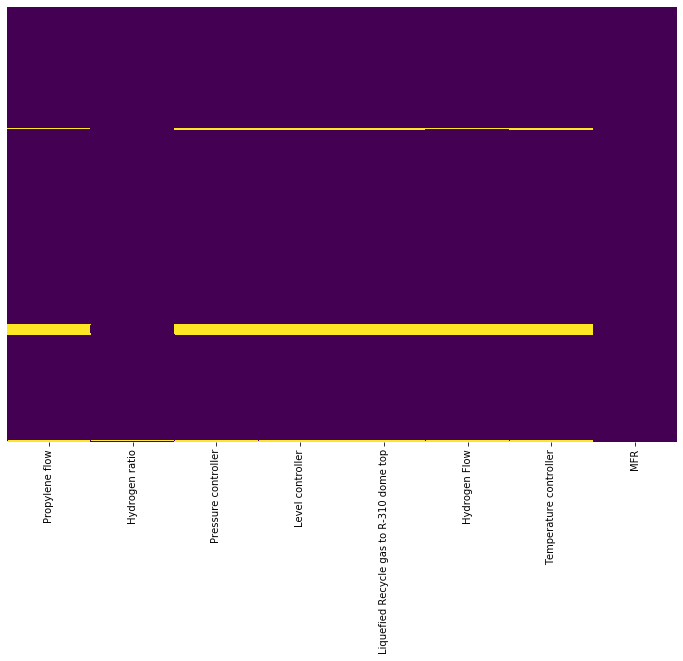

In [13]:
#Checking the null values by visualisation 

plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis',yticklabels=False)

In [14]:
#Checking Correlation
df.corr()['MFR'].sort_values()

Propylene flow                            -0.247960
Hydrogen Flow                             -0.208911
Level controller                          -0.006452
Temperature controller                     0.125628
Liquefied Recycle gas to R-310 dome top    0.233219
Hydrogen ratio                             0.316216
Pressure controller                        0.438837
MFR                                        1.000000
Name: MFR, dtype: float64

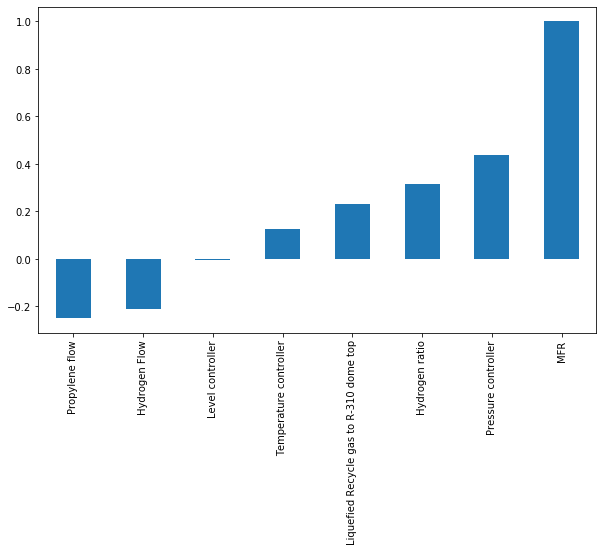

In [15]:
#Correlation plot
plt.figure(figsize=(10,6))
df.corr()['MFR'].sort_values().plot(kind='bar')

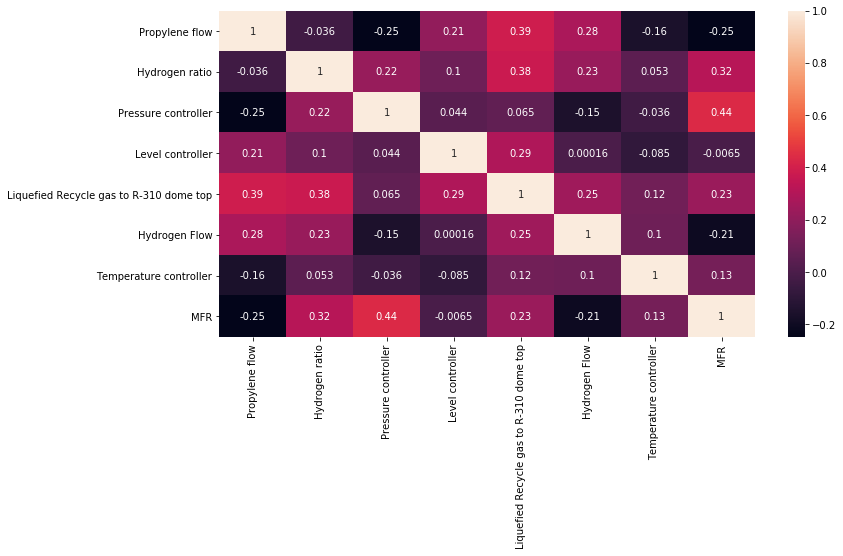

In [16]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True,cbar=True)

# EDA

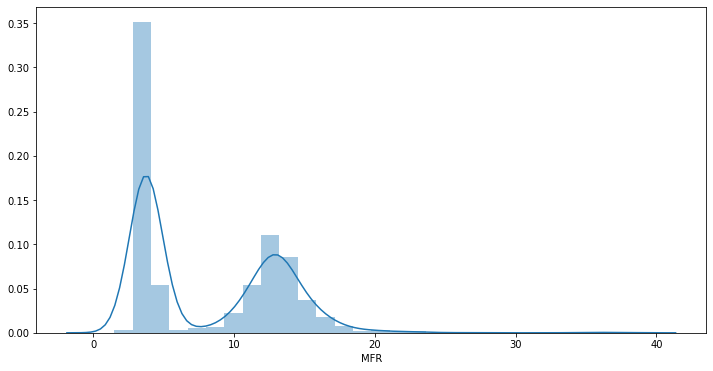

In [17]:
#Checking type of distribution
plt.figure(figsize=(12,6))
sns.distplot(df['MFR'])

D:\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


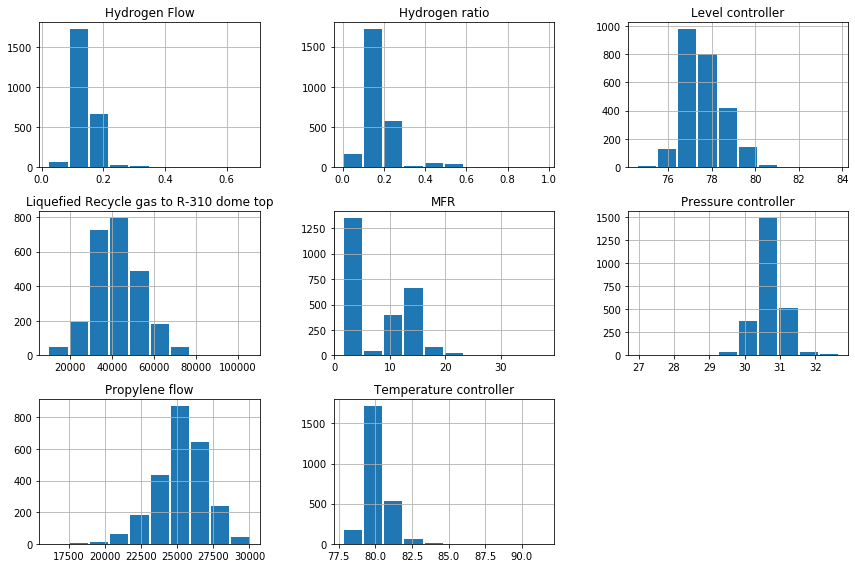

In [18]:
#Simple Visualisation of data using Pandas Histogram
fig = plt.figure(figsize=(12,8))
ax = fig.gca()
df.hist(rwidth=0.9,ax=ax)
plt.tight_layout()

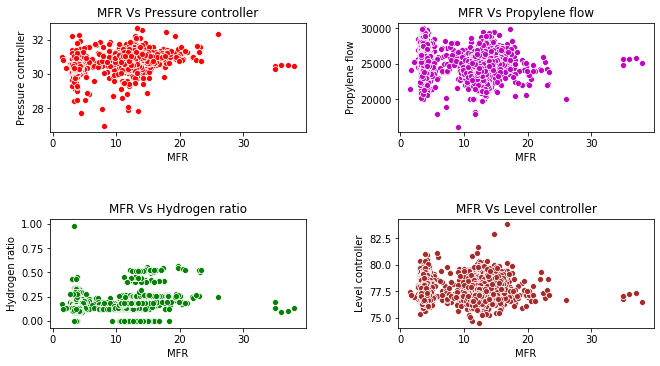

In [19]:
#Visualising continous features Vs MFR

#MFR Vs Pressure controller
plt.figure(figsize=(10,6))
plt.subplot(2,2,1)
sns.scatterplot(x='MFR',y='Pressure controller',data=df,color='r')
plt.title('MFR Vs Pressure controller')

#MFR Vs Propylene flow
plt.subplot(2,2,2)
sns.scatterplot(x='MFR',y='Propylene flow',data=df,color='m')
plt.title('MFR Vs Propylene flow')

#MFR Vs Hydrogen ratio
plt.subplot(2,2,3)
sns.scatterplot(x='MFR',y='Hydrogen ratio',data=df,color='g')
plt.title('MFR Vs Hydrogen ratio')

#MFR Vs Level controller
plt.subplot(2,2,4)
sns.scatterplot(x='MFR',y='Level controller',data=df,color='brown')
plt.title('MFR Vs Level controller')

plt.tight_layout(pad=4)

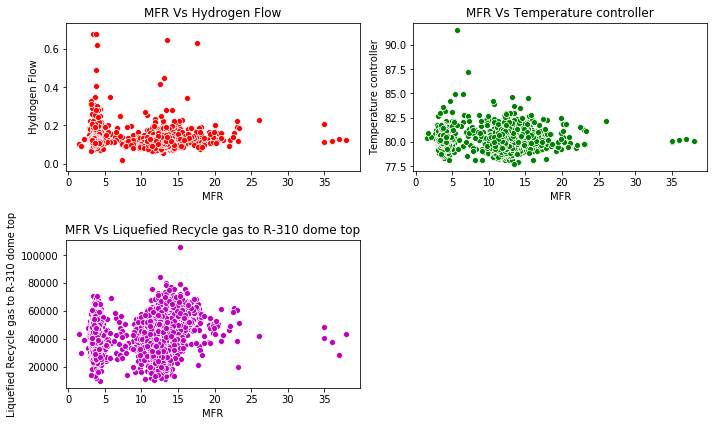

In [20]:
#Visualising continous features Vs MFR
#MFR Vs Hydrogen Flow
plt.figure(figsize=(10,6))
plt.subplot(2,2,1)
sns.scatterplot(x='MFR',y='Hydrogen Flow',data=df,color='r')
plt.title('MFR Vs Hydrogen Flow')

#MFR Vs Temperature controller
plt.subplot(2,2,2)
sns.scatterplot(x='MFR',y='Temperature controller',data=df,color='g')
plt.title('MFR Vs Temperature controller')

#MFR Vs Liquefied Recycle gas to R-310 dome top
plt.subplot(2,2,3)
sns.scatterplot(x='MFR',y='Liquefied Recycle gas to R-310 dome top',data=df,color='m')
plt.title('MFR Vs Liquefied Recycle gas to R-310 dome top')


plt.tight_layout(pad=1)

In [21]:
#Check for outiers
df['MFR'].describe()

count    2564.000000
mean        8.185218
std         5.088696
min         1.500000
25%         3.700000
50%         4.300000
75%        12.900000
max        38.000000
Name: MFR, dtype: float64

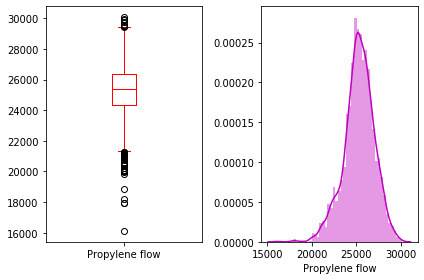

In [22]:

plt.subplot(1,2,1)
df['Propylene flow'].plot(kind='box',color='red')

plt.subplot(1,2,2)
sns.distplot(df['Propylene flow'],color='m')

plt.tight_layout()

In [23]:
df['MFR'].quantile([0.05,0.1,0.15,0.9,0.95,0.99])

0.05     3.300
0.10     3.500
0.15     3.600
0.90    14.500
0.95    15.700
0.99    19.548
Name: MFR, dtype: float64

In [24]:
#Linearity using correaltion coeficient matrix using corr
correlation = df[['Propylene flow','Hydrogen ratio','Pressure controller','Pressure controller','Level controller','Liquefied Recycle gas to R-310 dome top','Hydrogen Flow','Temperature controller']].corr()

In [25]:
correlation

,Propylene flow,Hydrogen ratio,Pressure controller,Pressure controller,Level controller,Liquefied Recycle gas to R-310 dome top,Hydrogen Flow,Temperature controller
Propylene flow,1.000000,-0.035846,-0.246382,-0.246382,0.207590,0.387429,0.280031,-0.157591
Hydrogen ratio,-0.035846,1.000000,0.221576,0.221576,0.104436,0.375745,0.226894,0.052967
Pressure controller,-0.246382,0.221576,1.000000,1.000000,0.044294,0.064547,-0.152372,-0.036286
Pressure controller,-0.246382,0.221576,1.000000,1.000000,0.044294,0.064547,-0.152372,-0.036286
Level controller,0.207590,0.104436,0.044294,0.044294,1.000000,0.289986,0.000157,-0.084688
Liquefied Recycle gas to R-310 dome top,0.387429,0.375745,0.064547,0.064547,0.289986,1.000000,0.246106,0.116090
Hydrogen Flow,0.280031,0.226894,-0.152372,-0.152372,0.000157,0.246106,1.000000,0.103214
Temperature controller,-0.157591,0.052967,-0.036286,-0.036286,-0.084688,0.116090,0.103214,1.000000


(array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9,  10]),
 array([0.93161595, 0.93435055, 0.93748575, 0.9410981 , 0.9451357 ,
        0.94973916, 0.95485073, 0.9601605 , 0.9663265 , 0.97210336,
        1.        , 0.97210336, 0.9663265 , 0.9601605 , 0.95485073,
        0.94973916, 0.9451357 , 0.9410981 , 0.93748575, 0.93435055,
        0.93161595], dtype=float32),
 <matplotlib.lines.Line2D at 0x21751a75d48>)

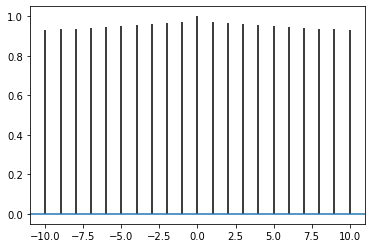

In [26]:
#Check The autocorrelation in demand using the acorr plot 
df_1 = pd.to_numeric(df['MFR'],downcast='float')
plt.acorr(df_1)

In [27]:
#Log Normalise the feature 'MFR'
df_1 = df['MFR']

In [28]:
df2 = np.log(df_1)

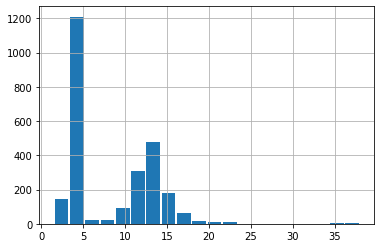

In [29]:
plt.figure
df_1.hist(rwidth=0.9,bins=20)

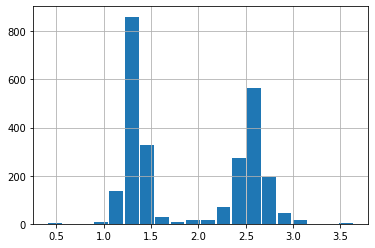

In [30]:
plt.figure
df2.hist(rwidth=0.9,bins=20)

In [31]:
df['MFR'] = np.log(df['MFR'])

In [32]:
#Auto correlation ih the demand column
t_1 = df['MFR'].shift(+1).to_frame()
t_1.columns = ['t-1']

In [33]:
t_2 = df['MFR'].shift(+2).to_frame()
t_2.columns = ['t-2']

In [34]:
t_3 = df['MFR'].shift(+3).to_frame()
t_3.columns = ['t-3']

In [35]:
#Concating The T1,T2,T3
df_lag = pd.concat([df,t_1,t_2,t_3],axis=1)

In [36]:
df_lag.head()

,Propylene flow,Hydrogen ratio,Pressure controller,Level controller,Liquefied Recycle gas to R-310 dome top,Hydrogen Flow,Temperature controller,MFR,t-1,t-2,t-3
0,24856.584,0.153,30.414835,79.657906,50850.578,0.163994,80.399605,1.223775,NaN,NaN,NaN
1,25537.250,0.153,30.527121,78.532608,42229.813,0.129739,78.861328,1.163151,1.223775,NaN,NaN
2,25689.266,0.153,30.356180,78.842636,45335.852,0.150003,78.818115,1.163151,1.163151,1.223775,NaN
3,25098.754,0.153,30.894308,79.173500,43077.016,0.151543,79.022720,1.131402,1.163151,1.163151,1.223775
4,24853.941,0.150,30.680647,78.677299,40404.387,0.122582,79.038483,1.193922,1.131402,1.163151,1.163151


# Dropping Null Values

In [37]:
df_lag = df_lag.dropna()

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X = df_lag.drop('MFR',axis=1).values

In [40]:
y = df_lag['MFR'].values

In [41]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=101)

# Feature Scaling

In [42]:
from sklearn.preprocessing import Normalizer

In [43]:
scaler = Normalizer()

In [44]:
X_train = scaler.fit_transform(X_train)

In [45]:
X_test = scaler.transform(X_test)

# Creating The Model 

In [46]:
#Linear regression
from sklearn.linear_model import LinearRegression

In [47]:
lr = LinearRegression()

In [48]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
#Create Y prediction 
pred = lr.predict(X_test)

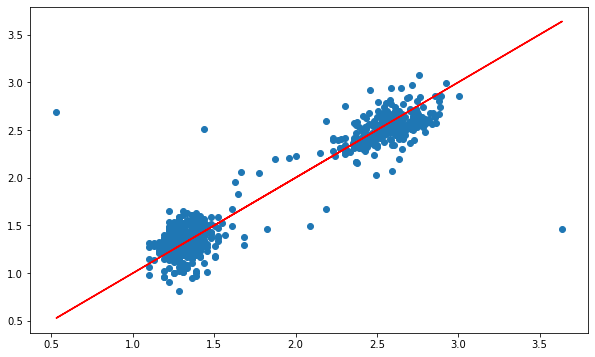

In [50]:
plt.figure(figsize=(10,6))
plt.scatter(y_test,pred)
plt.plot(y_test,y_test,'r')

# Evaluating The Model

In [51]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [52]:
print(r2_score(y_test,pred))

0.9070091817277798


In [53]:
print(mean_absolute_error(y_test,pred))

0.12294004369653978


In [54]:
print(mean_squared_error(y_test,pred))

0.03666653505929833


In [55]:
np.sqrt(mean_squared_error(y_test,pred))

0.19148507790242647

# Applying Random Forest

In [56]:
from sklearn.ensemble import RandomForestRegressor

In [57]:
forest = RandomForestRegressor(n_estimators=200)

In [58]:
forest.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [59]:
pred = forest.predict(X_test)

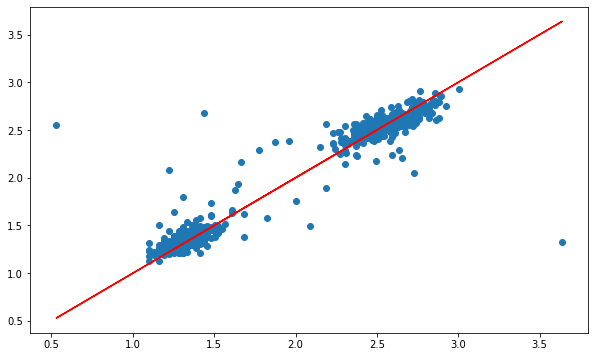

In [60]:
plt.figure(figsize=(10,6))
plt.scatter(y_test,pred)
plt.plot(y_test,y_test,'r')

In [61]:
print(r2_score(y_test,pred))

0.9345584373509369


In [62]:
print(mean_absolute_error(y_test,pred))

0.07561896954299266


In [63]:
np.sqrt(mean_squared_error(y_test,pred))

0.16063557482242286

# Applying Neural Network

In [64]:
from tensorflow.keras.models import Sequential

D:\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is 

In [65]:
from tensorflow.keras.layers import Dense

In [66]:
from tensorflow.keras.callbacks import EarlyStopping

In [67]:
from tensorflow.keras.layers import Dropout

In [68]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [69]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(15,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(1,activation='relu'))
model.compile(loss = 'mse',optimizer='adam')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [70]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Train on 1736 samples, validate on 745 samples
Epoch 1/600
1736/1736 [==============================] - 3s 2ms/sample - loss: 2.3426 - val_loss: 0.8411
Epoch 2/600
1736/1736 [==============================] - 0s 99us/sample - loss: 0.7898 - val_loss: 0.4376
Epoch 3/600
1736/1736 [==============================] - 0s 94us/sample - loss: 0.7498 - val_loss: 0.4222
Epoch 4/600
1736/1736 [==============================] - 0s 107us/sample - loss: 0.6734 - val_loss: 0.4063
Epoch 5/600
1736/1736 [==============================] - 0s 102us/sample - loss: 0.6303 - val_loss: 0.4092
Epoch 6/600
1736/1736 [==============================] - 0s 103us/sample - loss: 0.6130 - val_loss: 0.4035
Epoch 7/600
1736/1736 [==============================] - 0s 98us/sample - loss: 0.5775 - val_loss: 0.3962
Epoch 8/600
1736/1736 [==============================] - 0s 116us/sample - loss: 0.5749 - val_loss: 0.4002
Epoch 9/600
1736/1736 [==============================] - 0s 111us/sample - loss: 0.5479 - val_loss: 0.

Epoch 77/600
1736/1736 [==============================] - 0s 96us/sample - loss: 0.3688 - val_loss: 0.3090
Epoch 78/600
1736/1736 [==============================] - 0s 96us/sample - loss: 0.3597 - val_loss: 0.3093
Epoch 79/600
1736/1736 [==============================] - 0s 96us/sample - loss: 0.3616 - val_loss: 0.3084
Epoch 80/600
1736/1736 [==============================] - 0s 93us/sample - loss: 0.3660 - val_loss: 0.3087
Epoch 81/600
1736/1736 [==============================] - 0s 96us/sample - loss: 0.3590 - val_loss: 0.3089
Epoch 82/600
1736/1736 [==============================] - 0s 100us/sample - loss: 0.3510 - val_loss: 0.3080
Epoch 83/600
1736/1736 [==============================] - 0s 99us/sample - loss: 0.3623 - val_loss: 0.3104
Epoch 84/600
1736/1736 [==============================] - 0s 93us/sample - loss: 0.3590 - val_loss: 0.3089
Epoch 85/600
1736/1736 [==============================] - 0s 92us/sample - loss: 0.3587 - val_loss: 0.3094
Epoch 86/600
1736/1736 [============

Epoch 153/600
1736/1736 [==============================] - 0s 115us/sample - loss: 0.3398 - val_loss: 0.3065
Epoch 154/600
1736/1736 [==============================] - 0s 120us/sample - loss: 0.3341 - val_loss: 0.3064
Epoch 155/600
1736/1736 [==============================] - 0s 110us/sample - loss: 0.3362 - val_loss: 0.3095
Epoch 156/600
1736/1736 [==============================] - 0s 108us/sample - loss: 0.3323 - val_loss: 0.3061
Epoch 157/600
1736/1736 [==============================] - 0s 113us/sample - loss: 0.3417 - val_loss: 0.3062
Epoch 158/600
1736/1736 [==============================] - 0s 109us/sample - loss: 0.3319 - val_loss: 0.3058
Epoch 159/600
1736/1736 [==============================] - 0s 111us/sample - loss: 0.3364 - val_loss: 0.3062
Epoch 160/600
1736/1736 [==============================] - 0s 106us/sample - loss: 0.3335 - val_loss: 0.3061
Epoch 161/600
1736/1736 [==============================] - 0s 101us/sample - loss: 0.3323 - val_loss: 0.3068
Epoch 162/600
1736/

In [71]:
loss = pd.DataFrame(model.history.history)

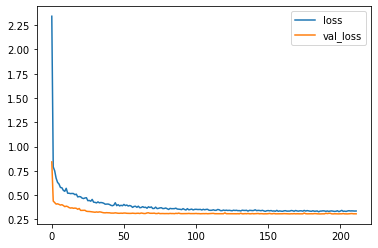

In [72]:
loss.plot()

In [73]:
predictions = model.predict_classes(X_test)

In [74]:
print(mean_absolute_error(y_test,predictions))

0.8705771923047261


In [75]:
print(r2_score(y_test,predictions))

-1.9165787855069847


In [76]:
np.sqrt(mean_squared_error(y_test,predictions))

1.07238753535663

# Random Forest Regressor is giving us the best results